In [2]:
import os 
import numpy as np
import copy
from six.moves import urllib
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [3]:
import sys
class kmeans:
    def __init__(self,k,data):
        self.nData=np.shape(data)[0]
        self.nDim=np.shape(data)[1]
        self.k=k
        self.data=data
    def kemeanstrain(self,maxIteration=10):
        #find the minium and maxium values for each feature
        minima=self.data.min(axis=0)
        maxima=self.data.max(axis=0)
        
        #pict the center locations randomly 
        #For obtaining the randomchoice,I have implemented two different ways of acquireing the centers 
        #It should be fine if you deicide to choose one of them. 
        random_index=np.random.choice(self.nData,self.k)
        self.centers=self.data[random_index]
        oldCenters=np.random.rand(self.k,self.nDim)*(maxima-minima)+minima
        assert self.centers.shape==oldCenters.shape
        
        count=0
        while np.sum(self.centers-oldCenters)!=0 and count<maxIteration:
            oldCenters=self.centers.copy()
            count+=1
            
            #compute eclidean distance
            distances=np.ones((1,self.nData))*np.sum((self.data-self.centers[0,:]),axis=1)
            for j in range(1,self.k):
                euclidean=np.ones((1,self.nData))*np.sum((self.data-self.centers[j,:])**2,axis=1)
                distances=np.append(distances,euclidean,axis=0)
            #Now the shape of distances is (self.k X self.nData). Then, we should select the cloest cluster for each instance 
            cluster=distances.argmin(axis=0)
            #our cluster is now transposed into the shape (self.nData X 1)
            cluster = np.transpose(cluster*np.ones((1,self.nData)))
            
            #update the cluster centers
            for j in range(self.k):
                thisCluster=np.where(cluster==j,1,0)
                #the number of instances beloning to each centeroid is gerater than zero
                if sum(thisCluster)>0:
                    self.centers[j,:]=np.sum(self.data*thisCluster,axis=0)/np.sum(thisCluster)
        return self.centers,cluster
    

        
                    

In [4]:
data=load_iris()
data=data['data']

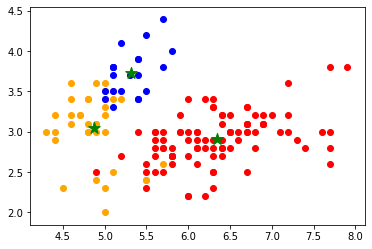

In [8]:
centers,cluster=kmeans(3,data).kemeanstrain()
colors=['orange','blue','red']
for i in range(data.shape[0]):
    plt.scatter(data[i,0],data[i,1],color=colors[int(cluster[i])])
plt.scatter(centers[:,0], centers[:,1], marker='*', c='g', s=150)

In [9]:
down_root='https://raw.githubusercontent.com/ardianumam/Machine-Learning-From-The-Scratch/master/test1_data.txt'
test1_path=os.path.join(r'C:\Users\sd4be\Desktop\data\test','test1_data.txt')

def get_data(url,data_path):
    if os.path.isdir(data_path):
        os.makdirs(data_path)
    urllib.request.urlretrieve(url,data_path)

get_data(down_root,test1_path)

In [10]:
train_data=np.loadtxt(test1_path,delimiter=' ')
#print the first 10 rows of train_data
print(train_data[:10])

[[ 2.1509  1.764 ]
 [ 8.478   0.083 ]
 [ 3.7587  0.1222]
 [ 3.3403  1.0473]
 [-0.8747  3.0516]
 [ 2.3664 -2.3542]
 [ 2.3951  2.4884]
 [ 8.809  -1.8172]
 [-0.3051 -3.9237]
 [ 6.0899  3.9702]]


In [11]:
centers,cluster=kmeans(2,train_data).kemeanstrain()


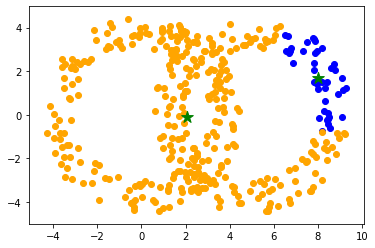

In [12]:
colors=['orange','blue','red']
for i in range(train_data.shape[0]):
    plt.scatter(train_data[i,0],train_data[i,1],color=colors[int(cluster[i])])
plt.scatter(centers[:,0], centers[:,1], marker='*', c='g', s=150)